In [1]:
#%pip install git+https://github.com/JustAnotherArchivist/snscrape.git

In [2]:
#%pip install matplotlib

In [3]:
#%pip install pandas

In [52]:
%pip install tabulate


  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import sqlite3
import warnings
import re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Ignorar las advertencias de DeprecatedFeatureWarning
#warnings.filterwarnings("ignore", category=sntwitter.DeprecatedFeatureWarning)

# Definir la cuenta de Twitter mencionada y el rango de fechas
account = "@TheBridge_Tech"
start_date = "2023-02-13"
end_date = "2023-05-22"

# Construir la consulta de búsqueda
query = f"{account} since:{start_date} until:{end_date}"

# Obtener los tweets utilizando snscrape
tweets = []
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    tweet_id = tweet.id
    text = tweet.rawContent
    date = tweet.date.strftime('%Y-%m-%d %H:%M:%S')
    author_id = tweet.user.id
    author_name = tweet.user.displayname
    author_username = tweet.user.username
    retweets = tweet.retweetCount
    replies = tweet.replyCount
    likes = tweet.likeCount
    quotes = tweet.quoteCount
    

    tweets.append([tweet_id, text, date, author_id, author_name, author_username, retweets, replies, likes, quotes])

    # Romper el bucle si se alcanza el límite de tweets deseados
    if len(tweets) >= 20000:
        break

# Crear un DataFrame a partir de la lista de tweets
columns = ["ID", "Text", "Date", "Author ID", "Author Name", "Author Username", "Retweets", "Replies", "Likes", "Quotes"]
tweets_df = pd.DataFrame(tweets, columns=columns)

# Imprimir el DataFrame
print(tweets_df)

Stopping after 20 empty pages


                      ID                                               Text   
0    1659514560200470559  Ayer visitamos a los alumnos de @TheBridge_Tec...  \
1    1659136842854219776  ¿Qué hacían nuestros alumni antes del #bootcam...   
2    1658825158994403329  #MLMonitoring and #Observability, mar, 23 may ...   
3    1658791064306688002  Nos colamos en el campus de #Bilbao para descu...   
4    1658430987368386566  Así es el #bootcamp de #UXUIProductDesign que ...   
..                   ...                                                ...   
138  1625828554691805187  ¿Los colores tienen género?¿podemos hacer una ...   
139  1625825721862987777                       @BitcoinTuesday_ ¡Un placer!   
140  1625813763751305216  Gracias a nuestros amigos @TheBridge_Tech por ...   
141  1625165984414695426  ¡Nos vamos al WorkinLan Workshop en Bilbao jun...   
142  1625126689150738438  Les compartimos un mini resumen del 1º encuent...   

                    Date            Author ID      

In [25]:
#exporto el dataset con la variable incluida
tweets_df.to_csv('C:/Users/Ade/Documents/Twitter&ML/tweets_df.csv', index=False)

In [26]:
#Explorar el dataset
# Estadísticos
tweets_df.describe()
# Tipos de los datos
tweets_df.dtypes
# Tipos de los datos y missings
tweets_df.info()
# Columnas del dataset
tweets_df.columns
# dimensiones del dataset
print("Filas:", tweets_df.shape[0])
print("Columnas:", tweets_df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               143 non-null    int64 
 1   Text             143 non-null    object
 2   Date             143 non-null    object
 3   Author ID        143 non-null    int64 
 4   Author Name      143 non-null    object
 5   Author Username  143 non-null    object
 6   Retweets         143 non-null    int64 
 7   Replies          143 non-null    int64 
 8   Likes            143 non-null    int64 
 9   Quotes           143 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 11.3+ KB
Filas: 143
Columnas: 10


In [27]:
tweets_df.describe()

,ID,Author ID,Retweets,Replies,Likes,Quotes
count,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000
mean,1.640923e+18,7.433382e+17,1.468531,0.349650,3.510490,0.153846
std,9.297728e+15,5.770250e+17,2.666443,0.674054,4.871398,0.521478
min,1.625127e+18,7.154412e+06,0.000000,0.000000,0.000000,0.000000
25%,1.634147e+18,1.003872e+09,0.000000,0.000000,1.000000,0.000000
50%,1.638579e+18,9.365398e+17,1.000000,0.000000,2.000000,0.000000
75%,1.648301e+18,1.162694e+18,2.000000,1.000000,4.000000,0.000000
max,1.659515e+18,1.613114e+18,25.000000,4.000000,39.000000,4.000000


In [35]:
#!pip install nltk

In [36]:
#%pip install emoji

In [61]:
for text in tweets_df["Text"]:
    print(text)

Ayer visitamos a los alumnos de @TheBridge_Tech  para charlar con ellos sobre las capacidades en prevención y detección de #ciberseguridad de @a3sec  y compartir experiencias que les puedan ayudar en su incorporación al mundo laboral.
¡Gracias por la invitación! https://t.co/r1YVULrSOl
¿Qué hacían nuestros alumni antes del #bootcamp?

Así fue el Open Day de #Sevilla donde compartieron su experiencia, dudas, miedos y sus ganas de hacer un cambio en su carrera 🚀

¿Ready para el cambio?

¡Últimas plazas!👉https://t.co/4DRdoJhQqv

@camaradesevilla @ENCamaraSevilla https://t.co/6VJRsx67Fx
#MLMonitoring and #Observability, mar, 23 may 2023, 18:30   | Meetup https://t.co/VEq7ZN3Plr
¡2º encuentro de la @mlopscommunity en @TheBridge_Tech ! Acompáñanos para aprender de nuestros amigos de @wayflyerapp @wallapop @argilla_io Registro gratuito, plazas limitadas. https://t.co/Zw5bKGP0av
Nos colamos en el campus de #Bilbao para descubrir más sobre #BBKBootcampsPoweredByTheBridge 😍

Echa un 👀 a las clas

In [64]:
#Limpieza del texto: 

# Definir función para limpiar los tweets
def clean_tweet(text):
    # Convertir el texto a minúsculas
    text = text.lower()
    
    # Eliminar caracteres especiales como @ y #
    text = re.sub(r'[@#]', '', text)
    
    # Eliminar URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Eliminar caracteres no alfanuméricos
    text = re.sub(r'\W', ' ', text)
    
    # Eliminar espacios adicionales
    text = re.sub(r'\s+', ' ', text).strip()
    # Eliminar menciones a usuarios
    text = re.sub(r"@[\w_]+", "", text)

    # Eliminar hashtags
    text = re.sub(r"#\w+", "", text)

    # Eliminar enlaces URL
    text = re.sub(r"https?://\S+", "", text)

    # Eliminar emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642" 
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    
    text = emoji_pattern.sub(r'', text)

    # Eliminar caracteres especiales y puntuación
    text = re.sub(r"[^\w\s]", "", text)

    # Convertir a minúsculas
    text = text.lower()
    return text

# Crear una nueva columna 'Text_cleaned' en el DataFrame original 'tweets_df'
tweets_df['Text_cleaned'] = tweets_df['Text'].apply(clean_tweet)

# Imprimir el DataFrame 'tweets_df' con la nueva columna 'Text_cleaned'
#print(tweets_df)

#exporto el dataset con la variable incluida
tweets_df.to_csv('C:/Users/Ade/Documents/Twitter&ML/tweets_df_clean.csv', index=False)

In [22]:
#%pip install seaborn

ANALISIS DEL TWITTER DE @thebridge_tech


1. ¿Cuál es el tweet con mayor repercusión social?

In [65]:
# Calcular relevancia con todas las metricas 
tweets_df['Relevance'] = tweets_df['Retweets'] + tweets_df['Replies'] + tweets_df['Likes'] + tweets_df['Quotes']

# Obtener el índice del tweet con el puntaje más alto
max_relevance_index = tweets_df['Relevance'].idxmax()

# Obtener el texto del tweet de mayor relevancia
top_tweet_text = tweets_df.loc[max_relevance_index, 'Text']

# Imprimir el tweet de mayor relevancia
print("El Tweet con mayor repercusión social es:")
print(top_tweet_text)

El Tweet con mayor repercusión social es:
Para reactivarse!!!
Tenemos Meetup este martes 11 de abril a las 19:00 en @TheBridge_Tech

@dev7ba nos hablará sobre la mempool!!
Charla para todo el mundo, sepas o no sobre #Bitcoin 

@GaboHBeaumont @kilrau @libertariadora @olya_borderless
https://t.co/bHzpDduIRo

Se agradece RT


b. ¿Cuál es el usuario que más menciona a la escuela?

In [66]:
user_with_most_tweets = tweets_df['Author Username'].value_counts().idxmax()
# Imprimir el resultado
print("1)El usuario con la mayor cantidad de tweets es:", user_with_most_tweets)
top_5_users = tweets_df['Author Username'].value_counts().nlargest(5)
print("2) Y el Top5 de usuarios es:")
print(top_5_users)

1)El usuario con la mayor cantidad de tweets es: TheBridge_Tech
2) Y el Top5 de usuarios es:
Author Username
TheBridge_Tech     45
DatabeerSVQ        17
nodosenlared        9
ESOLIUPO            6
decentralized_b     5
Name: count, dtype: int64


c. ¿En qué mes se concentra el mayor número de tweets?

In [67]:
# Convert the 'Text' column to string data type
tweets_df['Text'] = tweets_df['Text'].astype(str)

# Find the tweet with the highest number of tweets
tweet_with_max_tweets = tweets_df.loc[tweets_df['Text'].str.len().idxmax(), 'Text']

# Find the tweet with the highest number of retweets
tweet_with_max_retweets = tweets_df.loc[tweets_df['Retweets'].idxmax(), 'Text']

# Find the tweet with the highest number of replies
tweet_with_max_replies = tweets_df.loc[tweets_df['Replies'].idxmax(), 'Text']

# Print the results
print("1)Mes con el mayor número de tweets:", month_with_max_tweets)
print(tweet_with_max_tweets)
print()
print("2)Mes con el mayor número de retweets:", month_with_max_retweets)
print(tweet_with_max_retweets)
print()
print("3)Mes con el mayor número de replies:", month_with_max_replies)
print(tweet_with_max_replies)

1)Mes con el mayor número de tweets: March
@MISTERINCGNITA1 @PauMugarra @SingularSolving @TheBridge_Tech Tal vez la próxima vez! 🙃
(y lo de dar gracias es fácil: para mí, quien las recibe obtiene un beneficio, pero quien las da obtiene dos: reconoce lo bueno recibido y además ser agradecido está correlacionado con la felicidad; en cierta manera, lo hago más por mí q por el otro 🤣)

2)Mes con el mayor número de retweets: March
Para reactivarse!!!
Tenemos Meetup este martes 11 de abril a las 19:00 en @TheBridge_Tech

@dev7ba nos hablará sobre la mempool!!
Charla para todo el mundo, sepas o no sobre #Bitcoin 

@GaboHBeaumont @kilrau @libertariadora @olya_borderless
https://t.co/bHzpDduIRo

Se agradece RT

3)Mes con el mayor número de replies: April
Untagged Day - El evento de analítica digital al que a mí me gustaría asistir.

27 de abril  a partir de las 18:30.
En @TheBridge_Tech Madrid.
Entrada gratuita (plazas limitadas).

⚠️Mañana abrimos inscripciones. https://t.co/oTs9aotfbi


d. ¿Qué palabras son más frecuentes?

In [68]:
# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Obtener una lista de todas las palabras en los tweets
all_words = ' '.join(tweets_df['Text_cleaned']).split()

# Obtener las stopwords en español
stop_words = set(stopwords.words('spanish'))

# Filtrar las palabras, excluyendo las stopwords y los caracteres no alfanuméricos
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

# Contar la frecuencia de las palabras
word_counts = Counter(filtered_words)

# Obtener las 10 palabras más frecuentes
top_words = word_counts.most_common(10)

# Preparar los datos para la tabla
table_data = [(word, count) for word, count in top_words]

# Imprimir las palabras más frecuentes en formato de tabla
print("Palabras más frecuentes:")
print(tabulate(table_data, headers=["Palabra", "Frecuencia"], tablefmt="grid"))


Palabras más frecuentes:
+--------------+--------------+
| Palabra      |   Frecuencia |
+==============+==============+
| sngular      |           27 |
+--------------+--------------+
| gracias      |           20 |
+--------------+--------------+
| digital      |           20 |
+--------------+--------------+
| entradas     |           19 |
+--------------+--------------+
| bootcamp     |           17 |
+--------------+--------------+
| h            |           17 |
+--------------+--------------+
| sevilla      |           16 |
+--------------+--------------+
| madrid       |           16 |
+--------------+--------------+
| jueves       |           16 |
+--------------+--------------+
| opensistemas |           16 |
+--------------+--------------+


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


e. ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?

          Retweets   Replies     Likes    Quotes
Retweets  1.000000  0.358802  0.822343  0.631514
Replies   0.358802  1.000000  0.530757  0.246580
Likes     0.822343  0.530757  1.000000  0.573202
Quotes    0.631514  0.246580  0.573202  1.000000


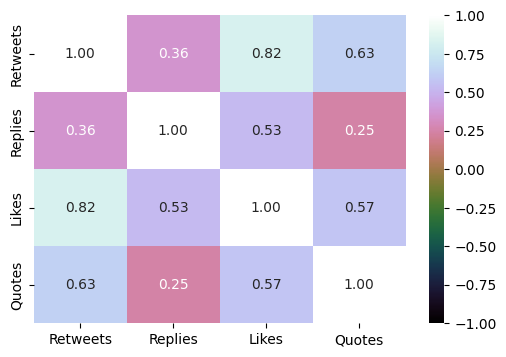

In [71]:
metrics = ['Retweets', 'Replies', 'Likes', 'Quotes']
metrics_df = tweets_df[metrics]

# Calculamos la matriz de correlación
corr_matrix = metrics_df.corr()

# Ordenamos las variables por su correlación con la columna "affairs" de forma ascendente
#corr_affairs = corr_matrix["affairs"].sort_values(ascending=True)

# Creamos el heatmap con la matriz de correlación
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, 
            cmap='cubehelix', 
            annot=True, 
            fmt='.2f', 
            vmin=-1, 
            vmax=1, 
            center=0)

# Mostramos las variables ordenadas por su correlación con la columna "affairs"
print(corr_matrix)

f. ¿Has sacado alguna conclusión extra en tu análisis?

- La cuenta de The Bridge es poco interactiuva, se publica y no se contesta ni retweet
- hay muy pocos usuarios que interactuan
- la relacion de tweet y likes es muy baja


In [ ]:
import pandas as pd
import sqlite3
import pickle
import csv

In [ ]:
tweets_df_clean=pd.read_csv("tweets_df_clean.csv")
tweets_df_clean.head (3)

In [ ]:
# Abrir el archivo en modo lectura binaria
with open("sentiment_model.pkl", 'rb') as archivo:
    # Cargar los datos desde el archivo pickle
    modelo = pickle.load(archivo)

In [ ]:
# Obtener el tipo de modelo
tipo_modelo = type(modelo)
print("Tipo de modelo:", tipo_modelo)

In [ ]:
#explorando el modelo
params = modelo.get_params()
print("Parámetros del modelo:")
print(params)
print("-"*50)
nombres_pasos = modelo.named_steps.keys()
print("Nombres de los pasos:")
print(list(nombres_pasos))
print("-"*50)
objetos_pasos = modelo.named_steps.values()
print("Objetos de los pasos:")
print(list(objetos_pasos))
print("-"*50)
vectorizador = modelo.named_steps['vect']
caracteristicas = vectorizador.get_feature_names()
print("Características del vectorizador:")
print(caracteristicas)
print("-"*50)
clasificador = modelo.named_steps['cls']
if hasattr(clasificador, 'coef_'):
    coeficientes = clasificador.coef_
    print("Coeficientes del clasificador:")
    print(coeficientes)

In [ ]:
clasificador = modelo.named_steps['cls']
if hasattr(clasificador, 'coef_'):
    coeficientes = clasificador.coef_
    # Obtener las características del vectorizador
    vectorizador = modelo.named_steps['vect']
    caracteristicas = vectorizador.get_feature_names()
    # Ordenar las características por su peso en valor absoluto
    importancia_caracteristicas = sorted(zip(caracteristicas, coeficientes[0]), key=lambda x: abs(x[1]), reverse=True)
    # Imprimir las características más importantes
    print("Variables más importantes:")
    for caracteristica, peso in importancia_caracteristicas:
        print(f"{caracteristica}: {peso}")


In [ ]:
# Configurar la conexión a la base de datos SQLite
conn = sqlite3.connect('tweets_TheBridge.db')

# Verificar si las tablas 'tweets' y 'users' ya existen
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='tweets'")
tweets_table_exists = cursor.fetchone()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='users'")
users_table_exists = cursor.fetchone()

# Crear la tabla 'usuarios' si no existe
usuarios_tabla = tweets_df_clean[["Author ID", "Author Name", "Author Username"]].copy()
usuarios_tabla.drop_duplicates(subset=['Author ID'], inplace=True)  # Eliminar duplicados

if not users_table_exists:
    usuarios_tabla.to_sql('usuarios', conn, if_exists='replace', index=False)

# Crear la tabla 'tweets' con la columna de 'Author ID' como clave externa si no existe
tweets_tabla = tweets_df_clean[["ID", "Text","Text_cleaned", "Date", "Author ID", "Retweets", "Replies", "Likes", "Quotes"]]

if not tweets_table_exists:
    tweets_tabla.to_sql('tweets', conn, if_exists='replace', index=False)

# Consultar los tweets y usuarios de las tablas
cursor = conn.cursor()
select_tweets = "SELECT * FROM tweets"
result_tweets = cursor.execute(select_tweets).fetchall()
print(result_tweets)

select_users = "SELECT * FROM users"
result_users = cursor.execute(select_users).fetchall()
print(result_users)

a. ¿Cuáles son las predicciones? Interpreta los resultados

In [ ]:
# Obtener los datos necesarios para hacer las predicciones
if tweets_table_exists and users_table_exists:
    cursor.execute("SELECT tweets.Text_cleaned, users.[Author ID] FROM tweets JOIN users ON tweets.[Author ID] = users.[Author ID]")
    data = cursor.fetchall()

    # Realizar predicciones
    predicciones = []
    for row in data:
        texto = row[0]
        author_id = row[1]
        prediccion = modelo.predict([texto])[0]
        predicciones.append((author_id, prediccion))

    # Exportar las predicciones a un archivo CSV
    output_file = r"C:\Users\Ade\Documents\Twitter&ML\predic_sql.csv"
    with open(output_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Author ID', 'Sentimiento'])
        writer.writerows(predicciones)

    print("Predicciones exportadas correctamente.")

conn.close()

In [ ]:
predic_sql = pd.read_csv("predic_sql.csv")
predic_sql

b. ¿Qué variables son las más importantes del modelo?

In [ ]:
clasificador = modelo.named_steps['cls']
if hasattr(clasificador, 'coef_'):
    coeficientes = clasificador.coef_
    # Obtener las características del vectorizador
    vectorizador = modelo.named_steps['vect']
    caracteristicas = vectorizador.get_feature_names()
    # Ordenar las características por su peso en valor absoluto
    importancia_caracteristicas = sorted(zip(caracteristicas, coeficientes[0]), key=lambda x: abs(x[1]), reverse=True)
    # Imprimir las características más importantes
    print("Variables más importantes:")
    for caracteristica, peso in importancia_caracteristicas:
        print(f"{caracteristica}: {peso}")

c. ¿Cómo podrías mejorar el modelo? 

- Probar hiperparámetros del modelo, como los parámetros de regularización, el tamaño del vocabulario, el tipo de vectorización, etc.
- Hacer un mayor trabajo de preprocesamiento: normalización de texto, eliminación de palabras poco informativas,
- Probar modelos basados en redes neuronales, ensambles de modelos, etc.
- Aumentar el tamaño o la calidad de los datos de entrenamiento 

d. ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros modelos de ML?

- Detección de spam
- Recomendación de contenido.
- Detección de fraudes
- Diagnóstico médico
- Análisis de imagen
- Pronóstico de demanda y stockaje